<a href="https://colab.research.google.com/github/zhou1126/Marquette_teaching_finance/blob/main/loan_approval_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
# target_folder = "/workspaces/Marquette_teaching_finance/"
taweilo_loan_approval_classification_data_path = kagglehub.dataset_download('taweilo/loan-approval-classification-data')

print('Data source import complete.')

print(taweilo_loan_approval_classification_data_path)


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.
/home/codespace/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Show all columns when printing the DataFrame
pd.set_option('display.max_columns', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/codespace/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/codespace/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv


In [3]:
# Read data to Pandas dataframe
df = pd.read_csv('/home/codespace/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv')
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# Check the data columns
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [5]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Identify categorical columns
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# present all unique values per categorical columns
for col in categorical_cols:
    print(f'for column {col}, the unique values are')
    print(df[col].unique())

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

for column person_gender, the unique values are
['female' 'male']
for column person_education, the unique values are
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
for column person_home_ownership, the unique values are
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
for column loan_intent, the unique values are
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
for column previous_loan_defaults_on_file, the unique values are
['No' 'Yes']


In [7]:
df_encoded.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'person_gender_male',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes'],
      dtype='object')

In [8]:
# Check numerical data distribution among different loan status
grouped_averages = df_encoded.groupby("loan_status").mean()

# Display the grouped averages
grouped_averages.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
loan_status,,,,,,,,,,,,,,,,,,,,,,
0,27.833571,86157.040743,5.476714,9219.576914,10.477981,0.121783,5.898286,632.814914,0.552171,0.2966,0.013686,0.265743,0.156029,0.002229,0.077971,0.4528,0.217171,0.100714,0.176286,0.172314,0.191171,0.653086
1,27.521300,59886.096900,5.178000,10855.689800,12.856794,0.202521,5.759700,631.887200,0.551500,0.3018,0.014200,0.267100,0.151900,0.003900,0.022200,0.7595,0.155200,0.125800,0.237800,0.152100,0.112800,0.000000


# Try Logistic Regression

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


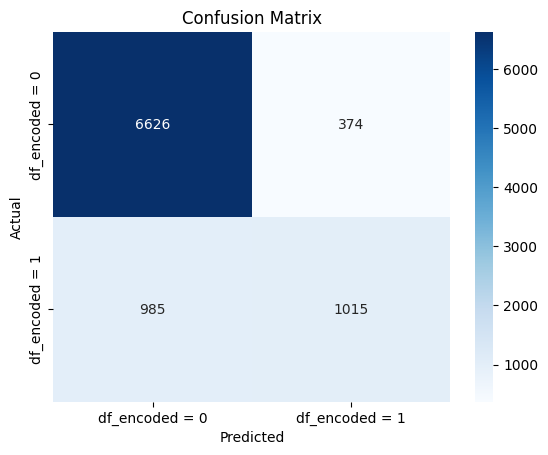

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7000
           1       0.73      0.51      0.60      2000

    accuracy                           0.85      9000
   macro avg       0.80      0.73      0.75      9000
weighted avg       0.84      0.85      0.84      9000

Accuracy: 0.849
AUC: 0.8712986428571429


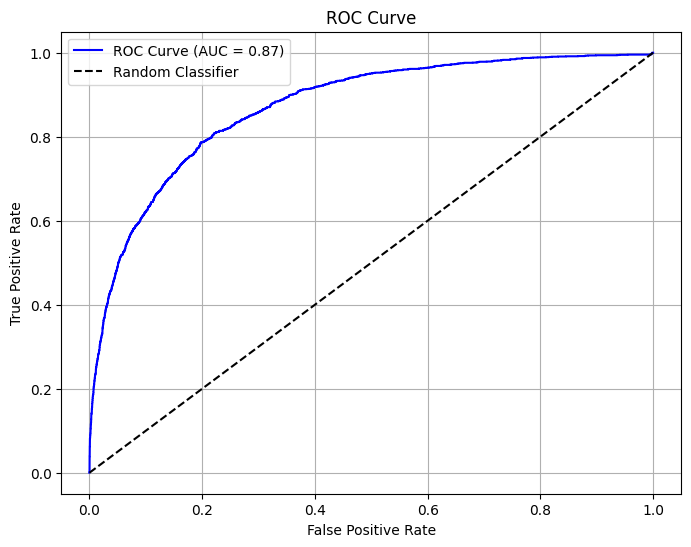

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# selected_features = [" Current Liability to Current Assets"]
selected_features = df_encoded.columns.drop("loan_status")
target = "loan_status"

# Features and target
X = df_encoded[selected_features]
y = df_encoded[target]

# Split data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["df_encoded = 0", "df_encoded = 1"], yticklabels=["df_encoded = 0", "df_encoded = 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.grid()
plt.show()


In [11]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_curve, confusion_matrix

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Create interactive plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Model', line=dict(dash='dash')))

# Add hover information for thresholds and display confusion matrix
for i in range(0, len(thresholds), max(1, len(thresholds) // 20)):
    y_pred_threshold = (y_pred_prob >= thresholds[i]).astype(int)
    cm = confusion_matrix(y_test, y_pred_threshold)
    tn, fp, fn, tp = cm.ravel()
    
    fig.add_trace(go.Scatter(
        x=[fpr[i]],
        y=[tpr[i]],
        mode='markers',
        marker=dict(size=8),
        name=f'Threshold: {thresholds[i]:.2f} (TPR: {tpr[i]:.2f}, FPR: {fpr[i]:.2f})\nTP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}'
    ))

fig.update_layout(
    title='Interactive ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    hovermode='closest'
)

fig.show()


In [ ]:
import numpy as np

# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": log_reg.coef_[0]  # Logistic Regression coefficients
})

# Sort by absolute value of coefficients
feature_importance["Abs_Coefficient"] = np.abs(feature_importance["Coefficient"])
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

# Display the top features
print("Top Features Driving the Decision:\n", feature_importance.drop(columns="Abs_Coefficient"))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance.head(10), palette="viridis")
plt.title("Top Features Driving Loan Status Prediction")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(x=0, color="black", linestyle="--")  # Reference line at 0
plt.show()


In [11]:
# convert boolean variables to 0/1 and output to csv
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include=['bool']).columns})
df_encoded.head(1000).to_csv('df_encoded.csv', index = False)